# Simulated Data Analysis

Plan for the simulated analysis:
- Get Mean, Variance of each variable, plot histogram of each variable ✓
- see how many estimated values are significant, subset data based on significant p-values (for each parameter separately?) ✓
- TODO Tommorow:
    - repeat for Scenarios 2 and 3
    - Intepret results - think about the implications of values with regards to the Scenarios model tokens
    - Check the gennerated data on cloud - Seems GOOD, no duplicates, so no special seed treatment was needed. ✓
    - Do the Regression on random data  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import statsmodels.api as sm
# from statsmodels import GMM
import seaborn as sns
import statsmodels.stats.api as sms

## Scenario 1

In [2]:
%%script false

##Scenario 1
file_path = r"D:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\simulated_data\Scenario1_5000runs_20230530_0839.csv"
df = pd.read_csv(file_path)
#measures = ['Skewness', 'Kurtosis', 'DW', 'DW_absolute', 'alphas', 'alphas_pval', 'betas', 'betas_pval', 'gammas', 'gammas_pval']
measures = ['Skewness', 'Kurtosis', 'DW', 'DW_absolute', 'alphas', 'betas',  'gammas']

print("--###---- Scenario 1 ----###-- ")

# df = df[['Skewness', 'Kurtosis', 'DW', 'DW_absolute', 'alphas', 'alphas_pval',
#        'betas', 'betas_pval', 'gammas', 'gammas_pval']]

for measure in ['Skewness', 'Kurtosis', 'DW', 'DW_absolute']:
    print(f"{measure} mean: {round(np.mean(df[measure]), 4)}, St.D: {round(np.std(df[measure]), 4)}")
    plt.hist(df[measure], bins = 50, edgecolor = "black")
    plt.title(measure)
    plt.show()

for measure, p_val in zip(['alphas', 'betas',  'gammas'], ['alphas_pval', 'betas_pval', 'gammas_pval']):
    data = df[df[p_val] <= 0.05]
    print(f"{measure} mean: {round(np.mean(data[measure]), 4)}, St.D: {round(np.std(data[measure]), 4)}, total {len(data)}")
    plt.hist(data[measure], bins = 50, edgecolor = "black")
    plt.title(measure)
    plt.show()

Couldn't find program: 'false'


## Scenario 2

In [3]:
%%script false

##Scenario 2
file_path = r"D:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\simulated_data\Scenario2_5000runs_20230529_1828.csv"
df = pd.read_csv(file_path)
#measures = ['Skewness', 'Kurtosis', 'DW', 'DW_absolute', 'alphas', 'alphas_pval', 'betas', 'betas_pval', 'gammas', 'gammas_pval']
measures = ['Skewness', 'Kurtosis', 'DW', 'DW_absolute', 'alphas', 'betas',  'gammas']

print("--###---- Scenario 2 ----###-- ")

for measure in ['Skewness', 'Kurtosis', 'DW', 'DW_absolute']:
    print(f"{measure} mean: {round(np.mean(df[measure]), 4)}, St.D: {round(np.std(df[measure]), 4)}")
    plt.hist(df[measure], bins = 50, edgecolor = "black")
    plt.title(measure)
    plt.show()

for measure, p_val in zip(['alphas', 'betas',  'gammas'], ['alphas_pval', 'betas_pval', 'gammas_pval']):
    data = df[df[p_val] <= 0.05]
    print(f"{measure} mean: {round(np.mean(data[measure]), 4)}, St.D: {round(np.std(data[measure]), 4)}, total {len(data)}")
    plt.hist(data[measure], bins = 50, edgecolor = "black")
    plt.title(measure)
    plt.show()


Couldn't find program: 'false'


## Scenario 3

In [4]:
%%script false

##Scenario 3
file_path = r"D:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\simulated_data\Scenario3_5000runs_20230530_1039.csv"
df = pd.read_csv(file_path)
#measures = ['Skewness', 'Kurtosis', 'DW', 'DW_absolute', 'alphas', 'alphas_pval', 'betas', 'betas_pval', 'gammas', 'gammas_pval']
measures = ['Skewness', 'Kurtosis', 'DW', 'DW_absolute', 'alphas', 'betas',  'gammas']

print("--###---- Scenario 3 ----###-- ")

for measure in ['Skewness', 'Kurtosis', 'DW', 'DW_absolute']:
    print(f"{measure} mean: {round(np.mean(df[measure]), 4)}, St.D: {round(np.std(df[measure]), 4)}")
    plt.hist(df[measure], bins = 50, edgecolor = "black")
    plt.title(measure)
    plt.show()

for measure, p_val in zip(['alphas', 'betas',  'gammas'], ['alphas_pval', 'betas_pval', 'gammas_pval']):
    data = df[df[p_val] <= 0.05]
    print(f"{measure} mean: {round(np.mean(data[measure]), 4)}, St.D: {round(np.std(data[measure]), 4)}, total {len(data)}")
    plt.hist(data[measure], bins = 50, edgecolor = "black")
    plt.title(measure)
    plt.show()

Couldn't find program: 'false'


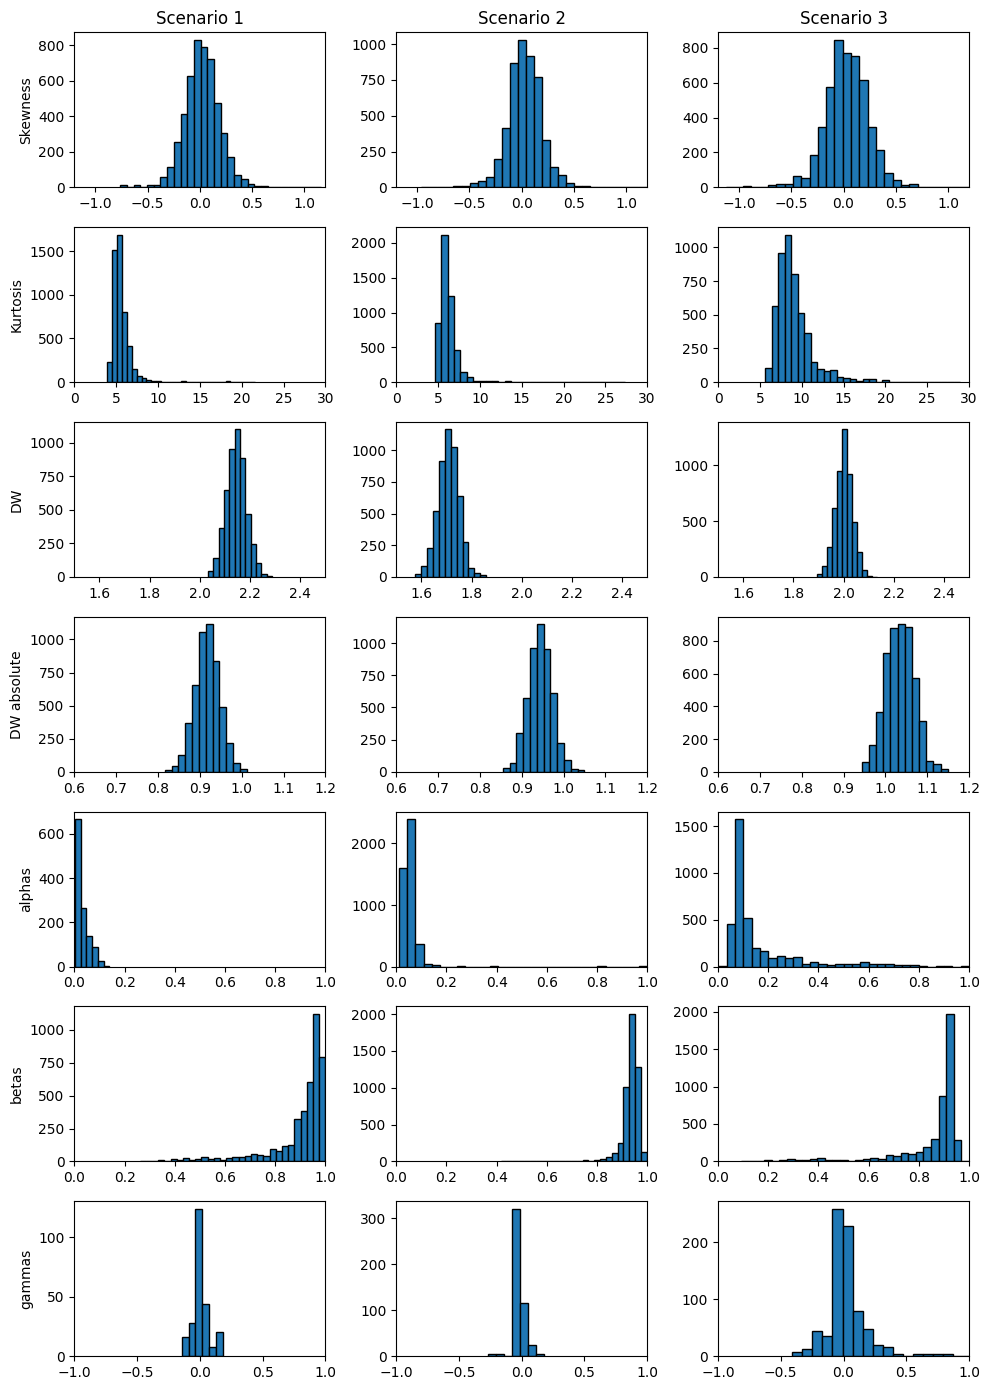

  Scenario Alphas Betas Gammas
0        1   1187  4104    240
1        2   4447  4952    473
2        3   3718  4528    787
  Scenario  Skewness  Kurtosis      DW  DW_absolute  alphas   betas  gammas  \
0        1    0.0232    5.5397  2.1450       0.9174  0.0310  0.9013 -0.0022   
1        1    0.1751    1.1726  0.0399       0.0290  0.0241  0.1189  0.0644   
2        2    0.0245    6.2392  1.7075       0.9441  0.0536  0.9331 -0.0147   
3        2    0.1758    1.4480  0.0411       0.0283  0.0430  0.0450  0.0469   
4        3    0.0311    9.0923  2.0007       1.0349  0.1616  0.8505  0.0590   
5        3    0.2088    2.2841  0.0337       0.0336  0.1558  0.1464  0.2831   

  Metric  
0   mean  
1    std  
2   mean  
3    std  
4   mean  
5    std  


In [5]:
###Join subplots of all histograms

files = ["Scenario1_5000runs_20230530_0839.csv", "Scenario2_5000runs_20230529_1828.csv", "Scenario3_5000runs_20230530_1039.csv"]
dataframes = []
for name in files:
    file_path = fr"D:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\simulated_data\{name}"
    df = pd.read_csv(file_path)
    df["Kurtosis"] = df["Kurtosis"]+3
    dataframes.append(df)

#measures = ['Skewness', 'Kurtosis', 'DW', 'DW_absolute', 'alphas', 'alphas_pval', 'betas', 'betas_pval', 'gammas', 'gammas_pval']

fig, axs = plt.subplots(7, 3, figsize=(10, 14))
limits1 = [[-1.2, 1.2],[0,30],[1.5,2.5],[0.6,1.2]]
bins1 = [30,30,12,12]
limits2 = [[0,1],[0,1],[-1,1]]
bins2 = [[6,30,30], [30,25,30], [6,7,30]]
# Iterate over the dataframes and variables to plot histograms
for i, dataframe in enumerate(dataframes):
    for j, variable in enumerate(['Skewness', 'Kurtosis', 'DW', 'DW_absolute']):
        # Select the corresponding axis for the subplot
        ax = axs[j, i]
        # Plot the histogram
        ax.hist(dataframe[variable], bins = bins1[j], edgecolor = "black")
        # Set the limits for X axis
        ax.set_xlim(limits1[j])

    for j, (variable, p_val) in enumerate(zip(['alphas', 'betas',  'gammas'], ['alphas_pval', 'betas_pval', 'gammas_pval'])):
        ax = axs[j+4, i]
        data = dataframe[dataframe[p_val] <= 0.05]
        ax.hist(data[variable], bins = bins2[j][i], edgecolor = "black")
        ax.set_xlim(limits2[j])

for j in range(3):
    axs[0, j].set_title(f'Scenario {j+1}')

for i, name in enumerate(['Skewness', 'Kurtosis', 'DW', 'DW absolute', 'alphas', 'betas',  'gammas']):
    axs[i, 0].set_ylabel(name)

plt.tight_layout()
plt.savefig(r"D:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\plots\final_plots\Scenarios_histograms.pdf",  format="pdf")
plt.show()

#Get the dataframe of Significance counts
signif_df = pd.DataFrame(columns=['Scenario', 'Alphas', 'Betas', 'Gammas'])
for i, dataframe in enumerate(dataframes):
    lens = []
    for variable, p_val in zip(['alphas', 'betas', 'gammas'], ['alphas_pval', 'betas_pval', 'gammas_pval']):
        data = dataframe[dataframe[p_val] <= 0.05]
        lens.append(len(data))
    
    # Create a dictionary with the values for the current scenario
    scenario_dict = {'Scenario': i+1, 'Alphas': lens[0], 'Betas': lens[1], 'Gammas': lens[2]}
    scenario_df = pd.DataFrame(scenario_dict, index=[0])
    signif_df = pd.concat([signif_df, scenario_df], ignore_index=True)

print(signif_df)

#Get the dataframe of means and standard deviations
mean_df = pd.DataFrame(columns=['Scenario', 'Skewness', 'Kurtosis', 'DW', 'DW_absolute', 'alphas', 'betas', 'gammas'])
for i, dataframe in enumerate(dataframes):
    means = {"Scenario":i+1, "Metric":"mean"}
    stds = {"Scenario":i+1, "Metric":"std"}
    for variable in ['Skewness', 'Kurtosis', 'DW', 'DW_absolute']:
        means[variable] = round(np.mean(dataframe[variable]),4)
        stds[variable] = round(np.std(dataframe[variable]),4)

    for variable, p_val in zip(['alphas', 'betas', 'gammas'], ['alphas_pval', 'betas_pval', 'gammas_pval']):
        data = dataframe[dataframe[p_val] <= 0.05]
        means[variable] = round(np.mean(data[variable]),4)
        stds[variable] = round(np.std(data[variable]),4)
    
    # Create a dictionary with the values for the current scenario
    mean_df = pd.concat([mean_df, pd.DataFrame(means, index=[0])], ignore_index=True)
    mean_df = pd.concat([mean_df, pd.DataFrame(stds, index=[0])], ignore_index=True)

print(mean_df)
mean_df.to_csv(r"D:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Tables\Simul_Scenarios_results.csv", index=True)



## Random Scenario

In [30]:
def load_random_data():
    folder_path = r'D:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Code_and_Data\Data_scraping\DEX_data_scraper\simulated_data\Random_scenario'
    files = os.listdir(folder_path)

    dataframes = []
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            dataframes.append(df)

    df = pd.concat(dataframes)

    return df

In [31]:
#Loading Dataframes and concatting
df = load_random_data()
cols = df.columns
print(cols)
print(df.shape)

print("Significant Alphas, Betas, Gammas: ", len(df[df.alphas_pval <= 0.05]), len(df[df.betas_pval <= 0.05]), len(df[df.gammas_pval <= 0.05]))
print("Significant Alphas+Betas, all three: ", len(df[(df.alphas_pval <= 0.05) & (df.betas_pval <= 0.05)]), len(df[(df.alphas_pval <= 0.05) & (df.betas_pval <= 0.05) & (df.gammas_pval <= 0.05)]))

# for column in cols:
#     plt.hist(df[column], bins=100, edgecolor = "black")
#     plt.title(column)
#     plt.show() #This is very interesting, inputs are uniform, as I set. A LOT of alphas significant, almost all betas, very few gammas


Index(['Scale', 'Base_scale', 'Window', 'AR_lags', 'AR_scale', 'AR_exog_scale',
       'Skewness', 'Kurtosis', 'DW', 'DW_absolute', 'alphas', 'alphas_pval',
       'betas', 'betas_pval', 'gammas', 'gammas_pval'],
      dtype='object')
(105180, 16)
Significant Alphas, Betas, Gammas:  76371 98958 12321
Significant Alphas+Betas, all three:  75451 10273


In [32]:
%%script false

##OLS reggression on random data
df = load_random_data()
#df["constant"] = 1
df['AR_interact'] = df['AR_lags'] * df['AR_scale']

df['alphas_signif'] = df['alphas'] * pd.Series(df['alphas_pval'] <= 0.05) #Either transform non-signif to 0, or consider only significant data - see whats better
df['betas_signif'] = df['betas'] * pd.Series(df['betas_pval'] <= 0.05)
df['gammas_signif'] = df['gammas'] * pd.Series(df['gammas_pval'] <= 0.05)

dependent = ['Skewness', 'Kurtosis', 'DW', 'DW_absolute', 'alphas', 'alphas_signif', 'betas', "betas_signif", 'gammas', 'gammas_signif']
independent = [ 'Scale', 'Base_scale', 'Window', 'AR_lags', 'AR_scale', 'AR_interact', 'AR_exog_scale']

#Data are uncorrelated
# corr_matrix = df[independent].corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show() 

#Adding interaction and using p_values to change non-significant to 0/remove

for y in dependent:
    print("--------------------------------- \n")
    print(f"{y} ~ {independent}")
    model = sm.OLS(df[y], df[independent]).fit()

    print(model.summary())

Couldn't find program: 'false'


In [33]:
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    print(f"Correlation of fitted values and residuals: {np.corrcoef(y_pred, residuals)}")
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.title("betas Residual Plot")
    plt.show()

def get_p_stars(x):
    if x > 0.1:
        return " "
    elif x > 0.05:
        return "^*" #LaTeX notation
        #return "*"
    elif x > 0.01:
        return "^{**}"
        #return "**"
    else:
        return "^{***}"
        #return "***"    

--------------------------------- 

Skewness ~ ['constant', 'Scale', 'Scale_sqrd', 'Base_scale', 'Window', 'AR_lags', 'AR_scale', 'AR_interact', 'AR_exog_scale']
Breusch-Pagant test:
(164.1339235962616, 2.1832092720367125e-31, 20.54704865498952, 2.061690250782128e-31)
                            OLS Regression Results                            
Dep. Variable:               Skewness   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.156
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           5.57e-05
Time:                        14:23:30   Log-Likelihood:                 14011.
No. Observations:              105180   AIC:                        -2.800e+04
Df Residuals:                  105171   BIC:                        -2.792e+04
Df Model:                           8                                         
Covariance Type:    

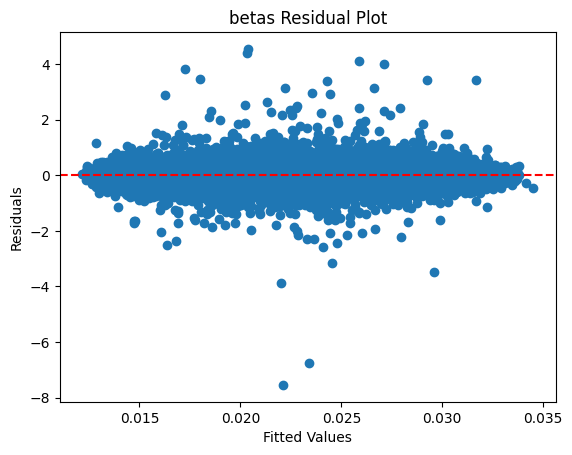

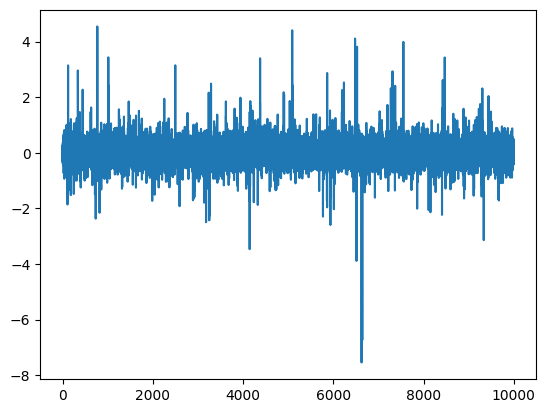

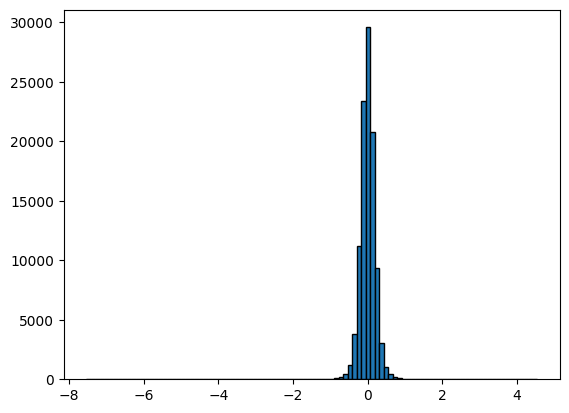

--------------------------------- 

Kurtosis ~ ['constant', 'Scale', 'Scale_sqrd', 'Base_scale', 'Window', 'AR_lags', 'AR_scale', 'AR_interact', 'AR_exog_scale']
Breusch-Pagant test:
(46.48914476211326, 1.9185554664991392e-07, 5.8132152679036055, 1.9121539965449926e-07)
                            OLS Regression Results                            
Dep. Variable:               Kurtosis   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     6321.
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:23:31   Log-Likelihood:            -2.5043e+05
No. Observations:              105180   AIC:                         5.009e+05
Df Residuals:                  105171   BIC:                         5.010e+05
Df Model:                           8                                         
Covariance Type:  

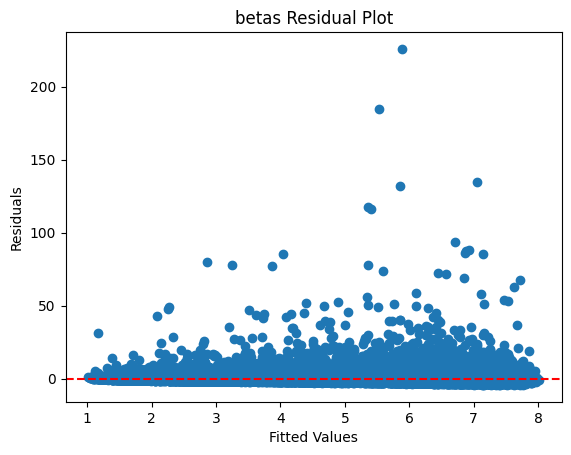

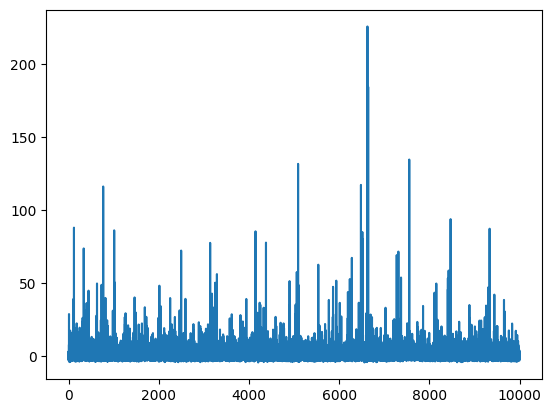

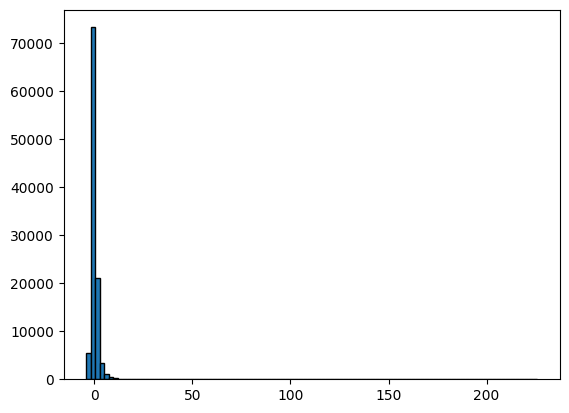

--------------------------------- 

DW ~ ['constant', 'Scale', 'Scale_sqrd', 'Base_scale', 'Window', 'AR_lags', 'AR_scale', 'AR_interact', 'AR_exog_scale']
Breusch-Pagant test:
(6730.217638150257, 0.0, 898.7116353141237, 0.0)
                            OLS Regression Results                            
Dep. Variable:                     DW   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                 3.041e+04
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:23:32   Log-Likelihood:             1.8543e+05
No. Observations:              105180   AIC:                        -3.708e+05
Df Residuals:                  105171   BIC:                        -3.708e+05
Df Model:                           8                                         
Covariance Type:                  HC0                          

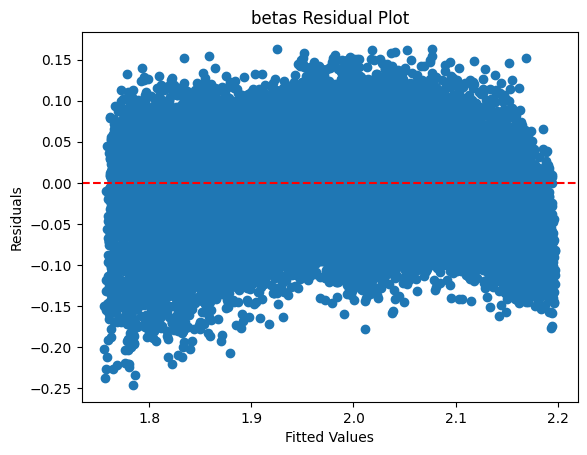

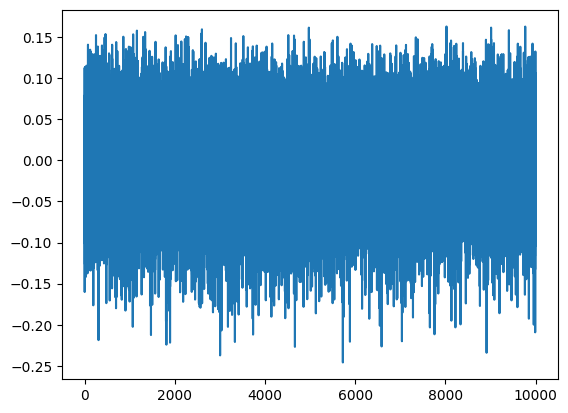

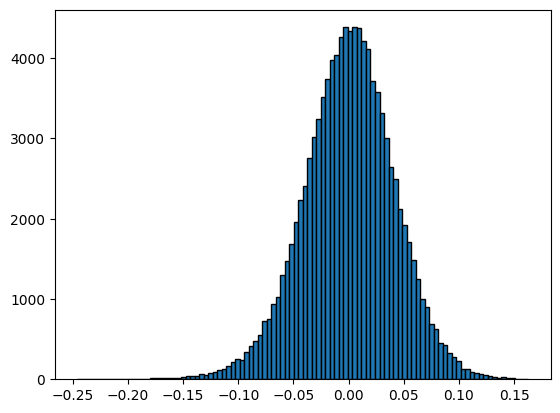

--------------------------------- 

DW_absolute ~ ['constant', 'Scale', 'Scale_sqrd', 'Base_scale', 'Window', 'AR_lags', 'AR_scale', 'AR_interact', 'AR_exog_scale']
Breusch-Pagant test:
(2080.175538570294, 0.0, 265.2455311027488, 0.0)
                            OLS Regression Results                            
Dep. Variable:            DW_absolute   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                 6.545e+04
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:23:34   Log-Likelihood:             2.1328e+05
No. Observations:              105180   AIC:                        -4.265e+05
Df Residuals:                  105171   BIC:                        -4.265e+05
Df Model:                           8                                         
Covariance Type:                  HC0                 

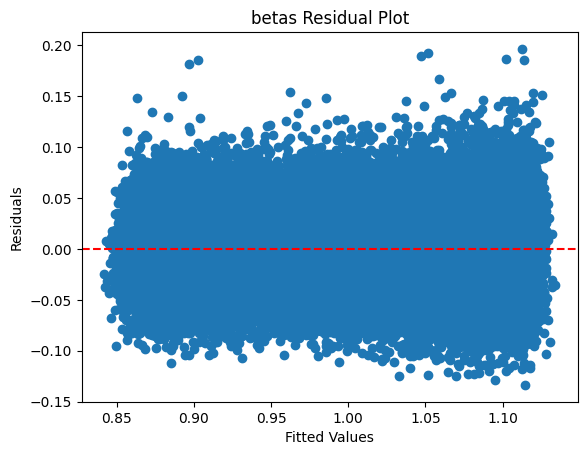

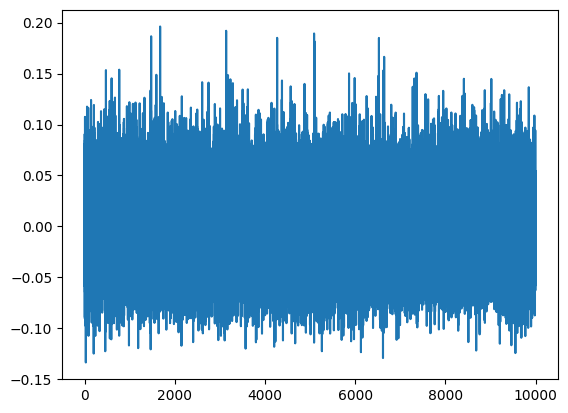

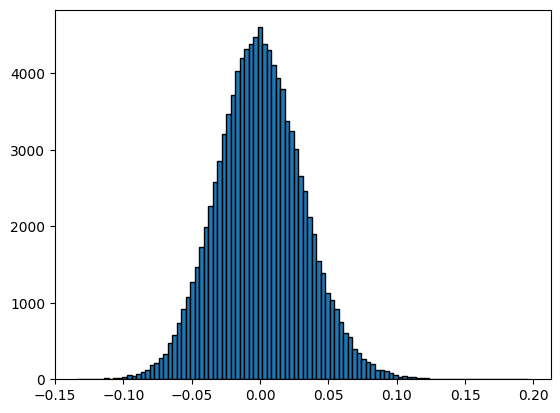

#############################################
--------------------------------- 

alphas ~ ['constant', 'Scale', 'Scale_sqrd', 'Base_scale', 'Window', 'AR_lags', 'AR_scale', 'AR_interact', 'AR_exog_scale']
Breusch-Pagant test:
(2609.849299548713, 0.0, 337.7342108949084, 0.0)
                            OLS Regression Results                            
Dep. Variable:                 alphas   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     1699.
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:23:35   Log-Likelihood:                 83091.
No. Observations:               76371   AIC:                        -1.662e+05
Df Residuals:                   76362   BIC:                        -1.661e+05
Df Model:                           8                                         
Covariance Ty

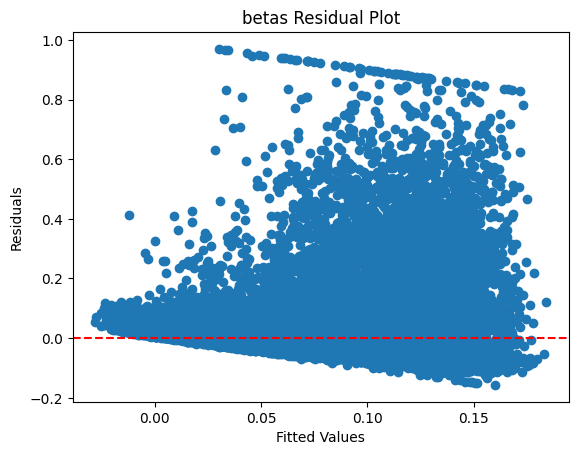

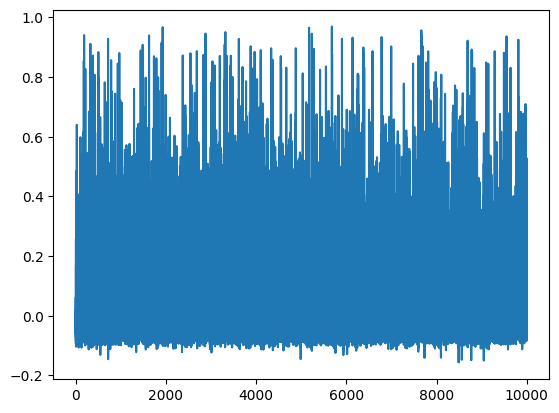

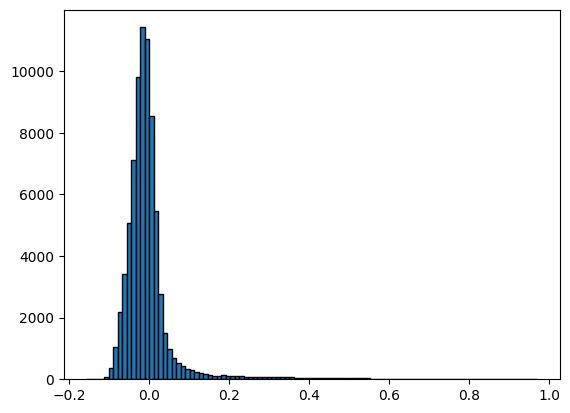

--------------------------------- 

betas ~ ['constant', 'Scale', 'Scale_sqrd', 'Base_scale', 'Window', 'AR_lags', 'AR_scale', 'AR_interact', 'AR_exog_scale']
Breusch-Pagant test:
(1891.6125914405875, 0.0, 241.0375765848659, 0.0)
                            OLS Regression Results                            
Dep. Variable:                  betas   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     1158.
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:23:36   Log-Likelihood:             1.0159e+05
No. Observations:               98958   AIC:                        -2.032e+05
Df Residuals:                   98949   BIC:                        -2.031e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                      

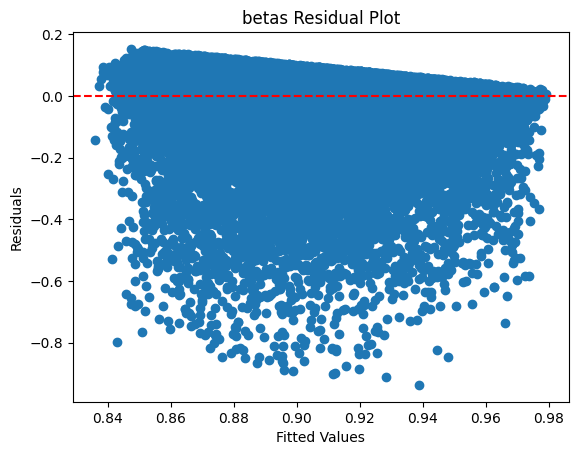

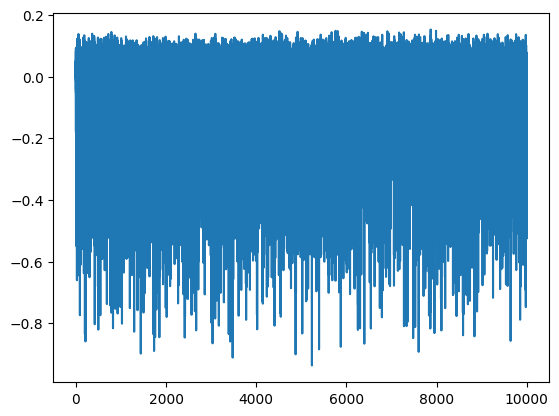

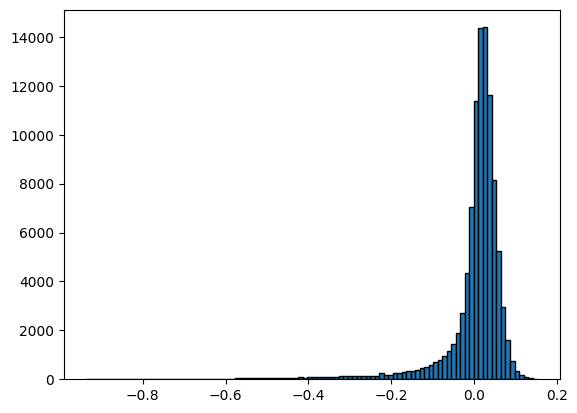

--------------------------------- 

gammas ~ ['constant', 'Scale', 'Scale_sqrd', 'Base_scale', 'Window', 'AR_lags', 'AR_scale', 'AR_interact', 'AR_exog_scale']
Breusch-Pagant test:
(132.47441573648595, 8.67990239821974e-25, 16.72705401559612, 6.3554205667683405e-25)
                            OLS Regression Results                            
Dep. Variable:                 gammas   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     9.110
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           1.43e-12
Time:                        14:23:38   Log-Likelihood:                 6998.3
No. Observations:               12321   AIC:                        -1.398e+04
Df Residuals:                   12312   BIC:                        -1.391e+04
Df Model:                           8                                         
Covariance Type:      

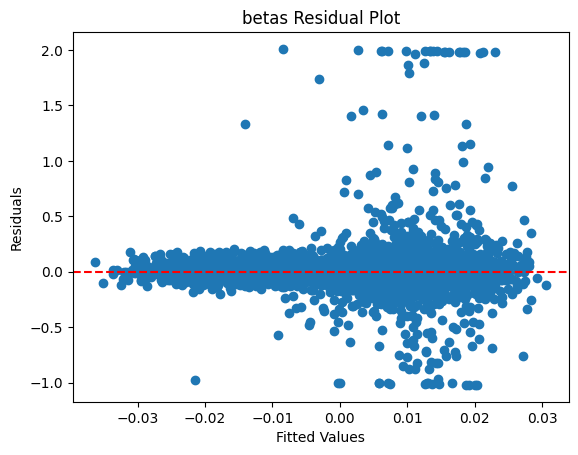

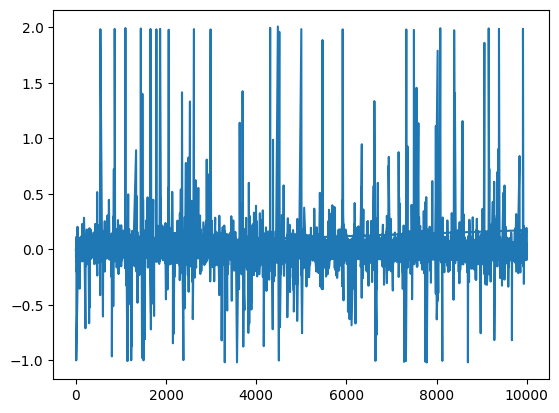

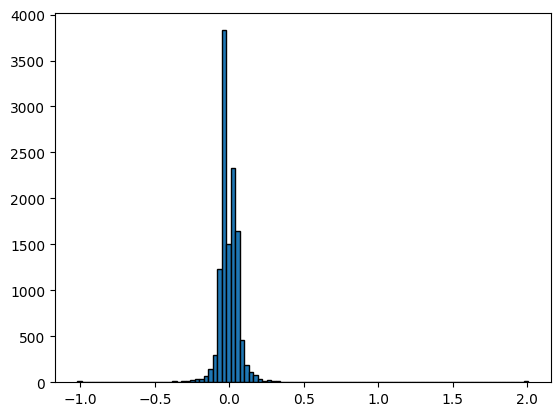

                    Skewness       Kurtosis             DW    DW_absolute  \
constant        0.0214^{***}   1.0854^{***}   1.9909^{***}   0.7322^{***}   
Scale                  -0.0    0.0186^{***}   0.0001^{***}   0.0013^{***}   
Scale_sqrd           0.0001         0.0005   -0.0001^{***}   -0.001^{***}   
Base_scale              0.0   -0.0184^{***}           0.0   -0.0001^{***}   
Window                 -0.0   -0.0067^{***}       0.0^{**}   0.0003^{***}   
AR_lags              0.0001        -0.0028   -0.0025^{***}  -0.0004^{***}   
AR_scale             0.0173   -1.4856^{***}  -0.1142^{***}  -0.0463^{***}   
AR_interact          0.0001        -0.084^*  -0.2066^{***}  -0.0083^{***}   
AR_exog_scale  -0.0977^{***}       -0.2129         0.0012        -0.0014    
Adj.R^2               0.0002         0.2847         0.7734         0.8393   
D.F.                  105171         105171         105171         105171   

                      alphas          betas         gammas  
constant      

In [49]:
#alternatively, do regression only on significant subset of data:
df = load_random_data()
df["constant"] = 1
df['AR_interact'] = df['AR_lags'] * df['AR_scale']
df['Scale_sqrd'] = df['Scale']*df['Scale']*0.001

dependent = ['Skewness', 'Kurtosis', 'DW', 'DW_absolute', 'alphas', 'alphas_signif', 'betas', "betas_signif", 'gammas', 'gammas_signif']

#Nicelz looking setting - this works quite nicely for interpretation, but OLS assumptions might be violated
# independent = ['Scale', 'Scale_sqrd', 'Base_scale', 'Window', 'AR_lags', 'AR_scale', 'AR_interact', 'AR_exog_scale']
#Alternative 1
independent = ['constant', 'Scale', "Scale_sqrd", 'Base_scale', 'Window', 'AR_lags', 'AR_scale', 'AR_interact', 'AR_exog_scale']




show_summaries = True

df_columns = []

for y in ['Skewness', 'Kurtosis', 'DW', 'DW_absolute']:
    print("--------------------------------- \n")
    print(f"{y} ~ {independent}")
    model = sm.OLS(df[y], df[independent]).fit(cov_type = 'HC0')

    #print(np.around(model.params),4)
    #print(model.params.round(5))
    #print(model.pvalues)

    column = []
    for param, pval in zip(model.params, model.pvalues):
        column.append(str(round(param, 4)) + get_p_stars(pval))

    column.append(round(model.rsquared_adj, 4))
    column.append(int(model.df_resid))

    #print(column)
    df_columns.append(column)

    print("Breusch-Pagant test:")
    test_result = sms.het_breuschpagan(model.resid, model.model.exog)
    print(test_result)

    if show_summaries:
        print(model.summary())
        #Checking for OLS assumptions: Independence of residuals
        y_pred = model.predict()
        plot_residuals(df[y], y_pred)
        plt.plot(model.resid)
        plt.show()
        plt.hist(model.resid, bins = 100, edgecolor = "black")
        plt.show()

print("#############################################")
for y, p_val in zip(['alphas', 'betas', 'gammas'], ['alphas_pval', 'betas_pval', 'gammas_pval']):
    print("--------------------------------- \n")
    data = df[df[p_val] <= 0.05]
    print(f"{y} ~ {independent}")
    model = sm.OLS(data[y], data[independent]).fit()

    column = []
    for param, pval in zip(model.params, model.pvalues):
        column.append(str(round(param, 4)) + get_p_stars(pval))

    column.append(round(model.rsquared_adj, 4))
    column.append(int(model.df_resid))

    #print(column)
    df_columns.append(column)

    print("Breusch-Pagant test:")
    test_result = sms.het_breuschpagan(model.resid, model.model.exog)
    print(test_result)

    if show_summaries:
        print(model.summary())    
        #Checking for OLS assumptions: Independence of residuals
        y_pred = model.predict()
        plot_residuals(data[y], y_pred)
        plt.plot(model.resid)
        plt.show()
        plt.hist(model.resid, bins = 100, edgecolor = "black")
        plt.show()

df = pd.DataFrame(df_columns)
df = df.T
df.columns = ['Skewness', 'Kurtosis', 'DW', 'DW_absolute', 'alphas', 'betas', 'gammas']
df.index = ['constant', 'Scale', 'Scale_sqrd', 'Base_scale', 'Window', 'AR_lags', 'AR_scale', 'AR_interact', 'AR_exog_scale', 'Adj.R^2', 'D.F.']
print(df)
#df.to_csv(r"D:\Dokumenty\Vejška\Magisterské studium\DIPLOMKA\Tables\Simul_rand_OLS_HC0.csv", index=True)
#OK, perhaps lets go with this one. I will include also R^2 and n.obs columns
#I think I should do some analysis on the significance clustering.
#I should probably adress the OLS assumptions - residuals are not perfectly normal, but ok

In [35]:
[0.0004 - i * (0.0003 / (3 - 1)) for i in range(3)]

[0.0004, 0.00025, 0.00010000000000000005]

In [36]:
data = [[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]]

# Create DataFrame from the list of lists
df = pd.DataFrame(data)
df = df.T

# Print the DataFrame
print(df)

   0  1  2
0  1  2  3
1  4  5  6
2  7  8  9


In [37]:
##Modelling logit probabilities of parameters being significant
df = load_random_data()
#df["constant"] = 1
df['AR_interact'] = df['AR_lags'] * df['AR_scale']
df['Scale_sqrd'] = df['Scale']*df['Scale']

df["alpha_signif"] = pd.Series((df["alphas_pval"] <= 0.05)*1)
df["beta_signif"] = pd.Series((df["betas_pval"] <= 0.05)*1)
df["gamma_signif"] = pd.Series((df["gammas_pval"] <= 0.05)*1)

dependent = ['alpha_signif', 'beta_signif', 'gamma_signif']
independent = [ 'Scale', 'Scale_sqrd', 'Base_scale', 'Window', 'AR_lags', 'AR_scale', 'AR_interact', 'AR_exog_scale']

for y in dependent:
    print("--------------------------------- \n")
    print(f"{y} ~ {independent}")
    model = sm.Logit(df[y], df[independent]).fit()

    print(model.summary())

##Conclucion - there are significant relationships, but the R^2 is very low and the relationships themsleves are also low...so probably not including this

--------------------------------- 

alpha_signif ~ ['Scale', 'Scale_sqrd', 'Base_scale', 'Window', 'AR_lags', 'AR_scale', 'AR_interact', 'AR_exog_scale']
Optimization terminated successfully.
         Current function value: 0.547158
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           alpha_signif   No. Observations:               105180
Model:                          Logit   Df Residuals:                   105172
Method:                           MLE   Df Model:                            7
Date:                Fri, 09 Jun 2023   Pseudo R-squ.:                 0.06803
Time:                        11:28:58   Log-Likelihood:                -57550.
converged:                       True   LL-Null:                       -61751.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

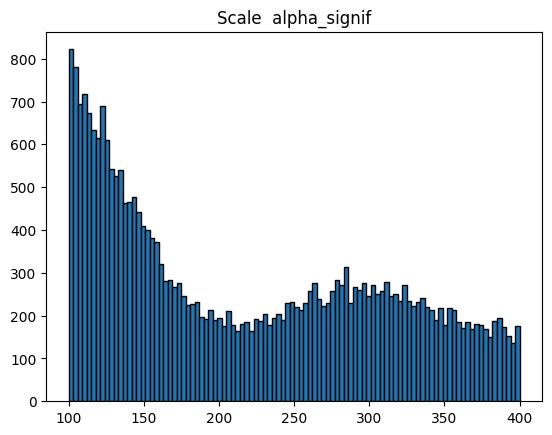

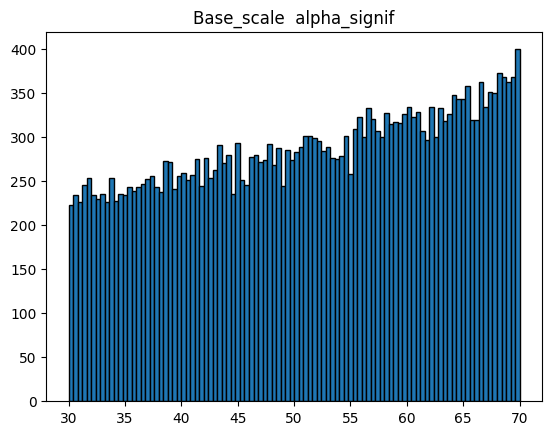

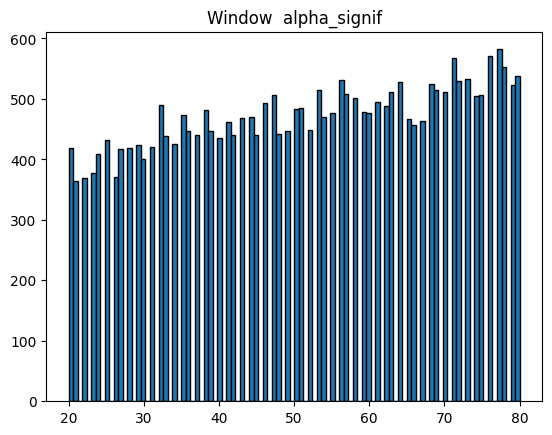

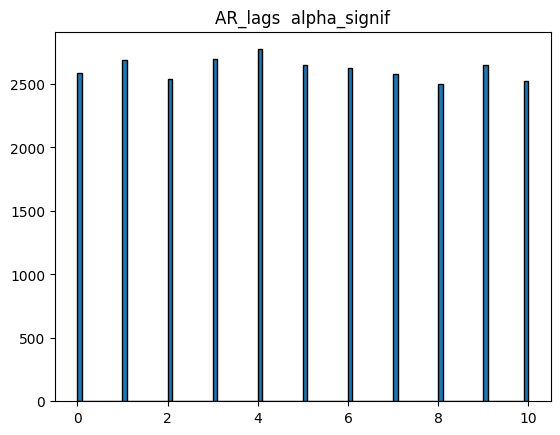

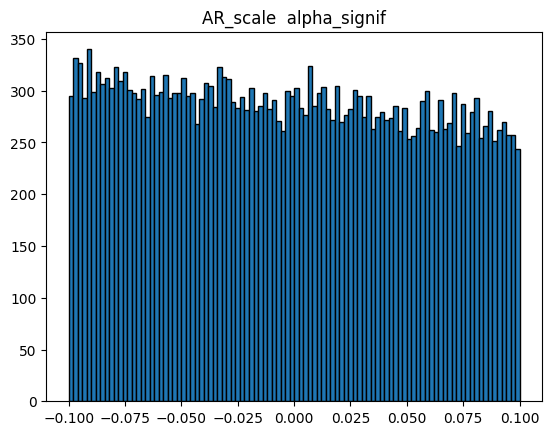

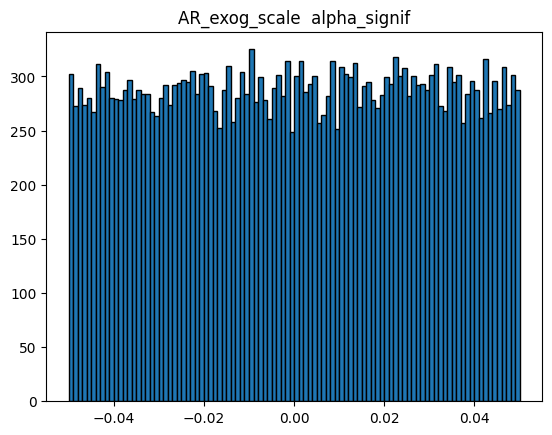

###################################


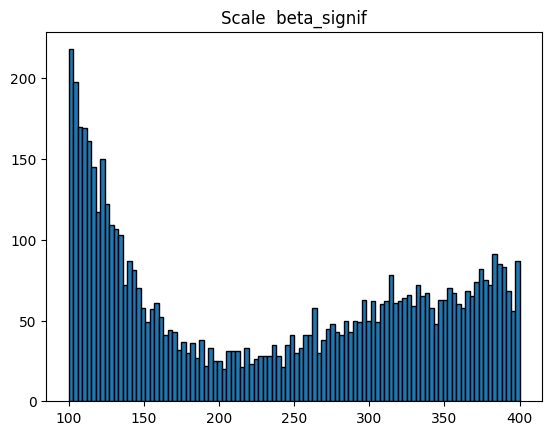

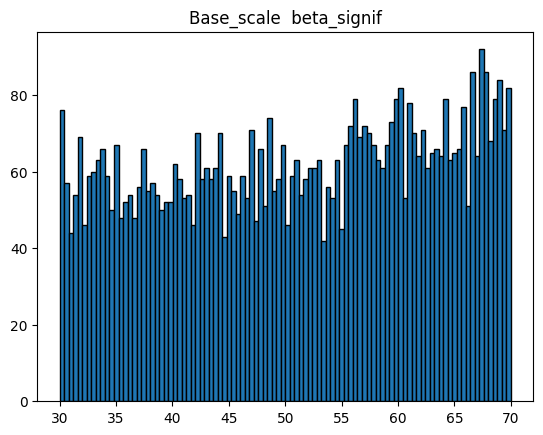

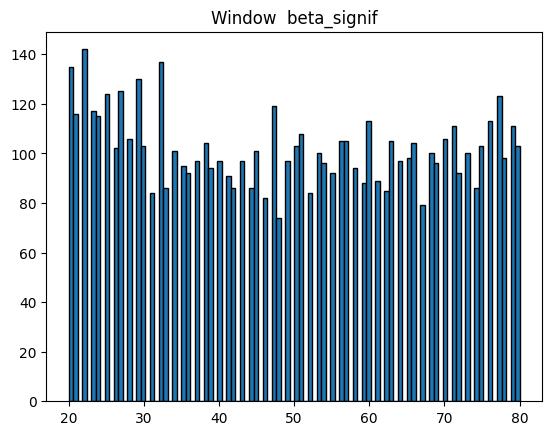

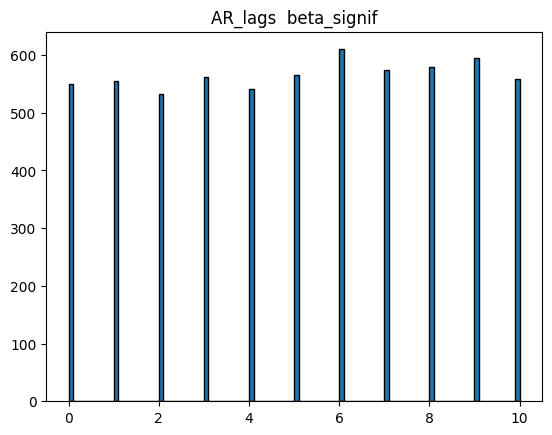

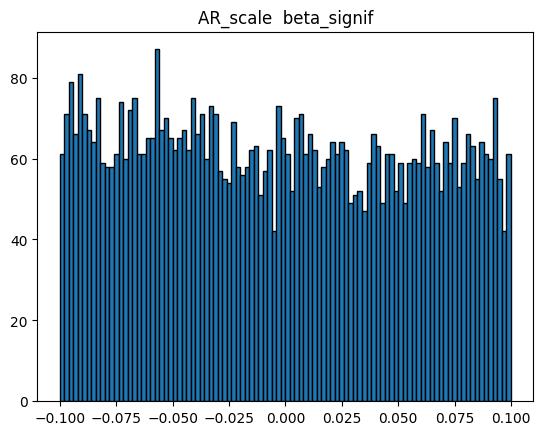

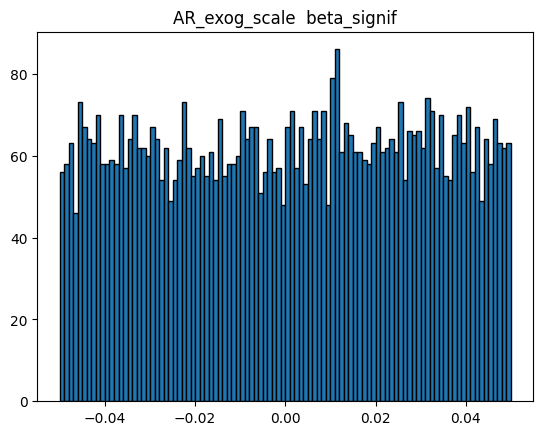

###################################


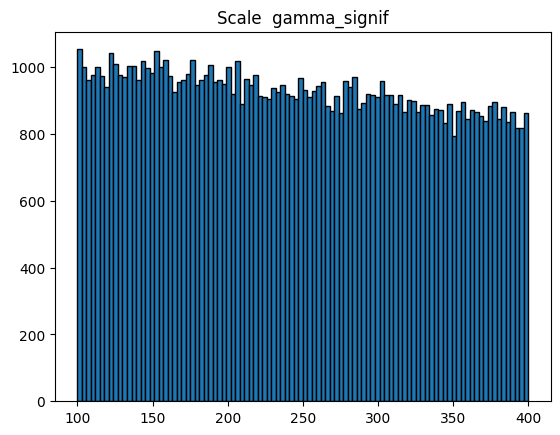

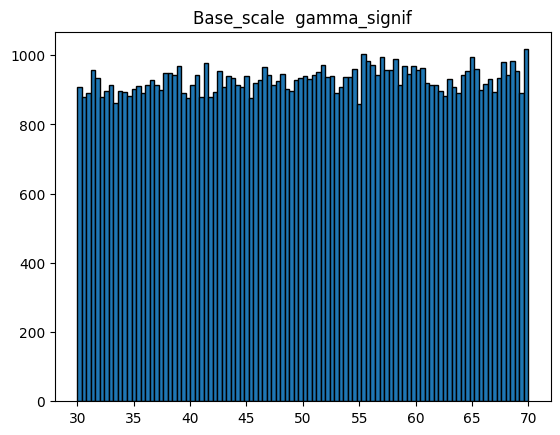

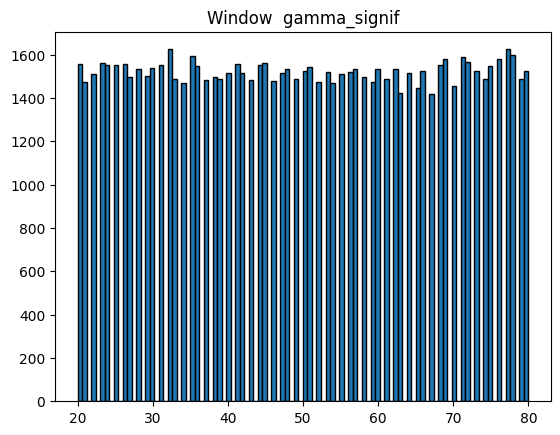

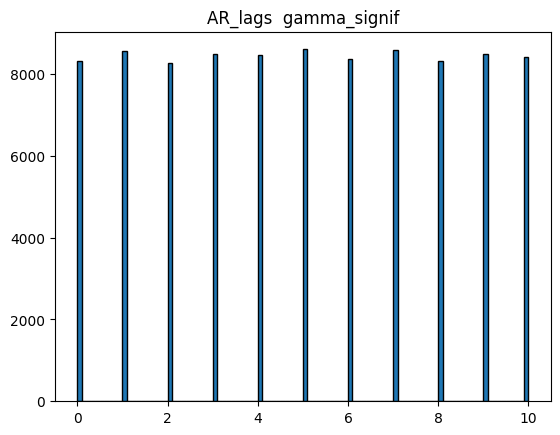

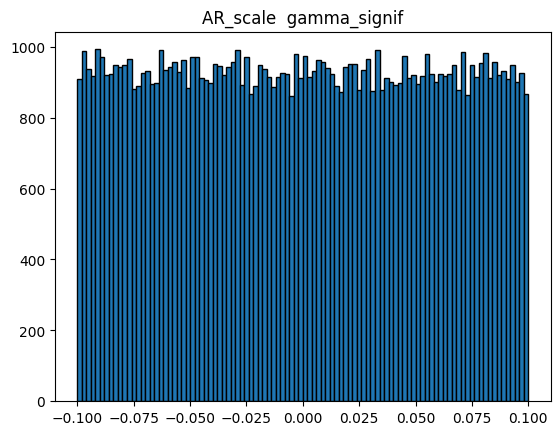

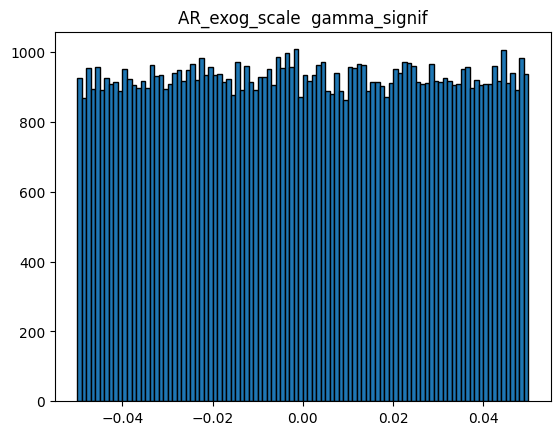

###################################


In [38]:
##last check on p-values - are they grouped based on the independnet (input) variable values?
#next todo: Add the p-value binary to dataframe, then for each plot histograms/plots with color distinction?
df = load_random_data()
#df["constant"] = 1
df['AR_interact'] = df['AR_lags'] * df['AR_scale']

df["alpha_signif"] = df["alphas_pval"] <= 0.05
df["beta_signif"] = df["betas_pval"] <= 0.05
df["gamma_signif"] = df["gammas_pval"] <= 0.05

independent = [ 'Scale', 'Base_scale', 'Window', 'AR_lags', 'AR_scale', 'AR_exog_scale']

for sig_var in ['alpha_signif', 'beta_signif', 'gamma_signif']:
    for variable in independent:
        plt.hist(df[variable][~df[sig_var]], bins = 100, edgecolor = "black")
        plt.title(variable + '  ' + sig_var)
        plt.show()
    print("###################################")



    #hmm these plots are also interesting, they nicely show optimum value of scale for alpha to be significant. 
    # But is it useful or not? It is probably caused by the simulation design, so I am not sure if it carries any information.




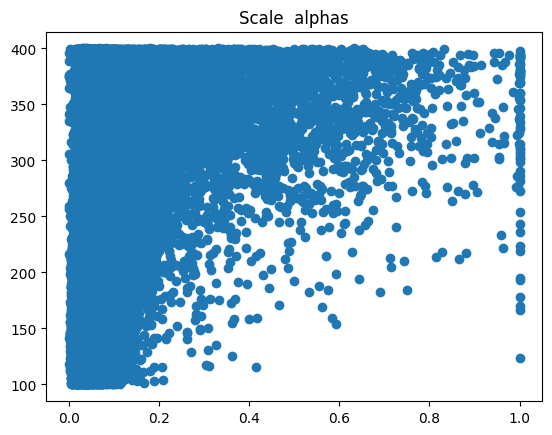

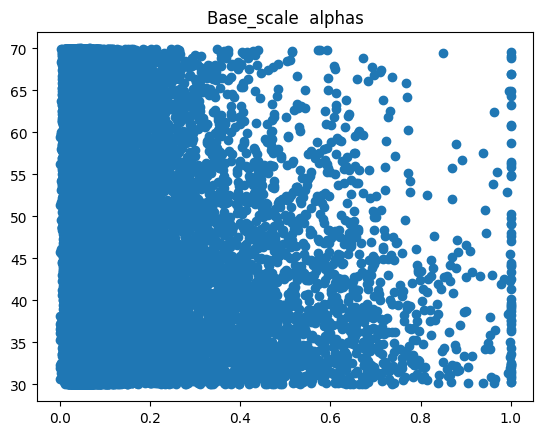

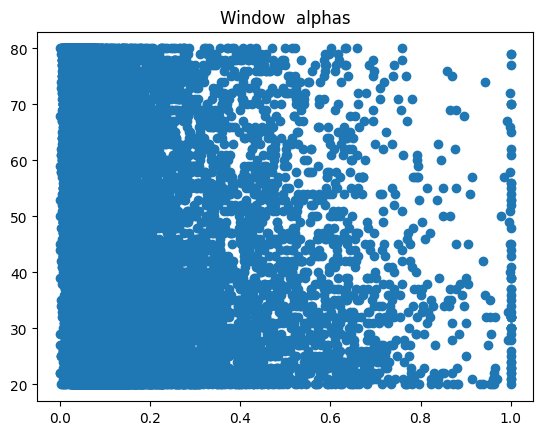

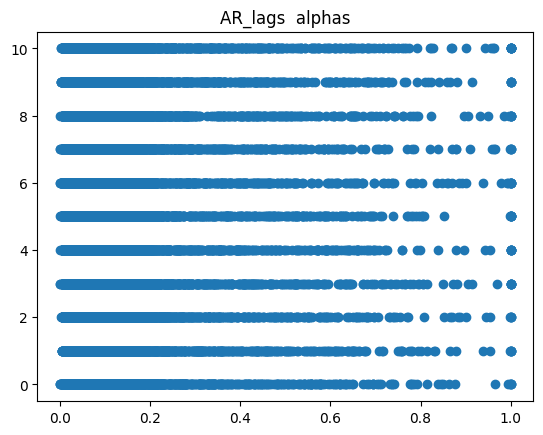

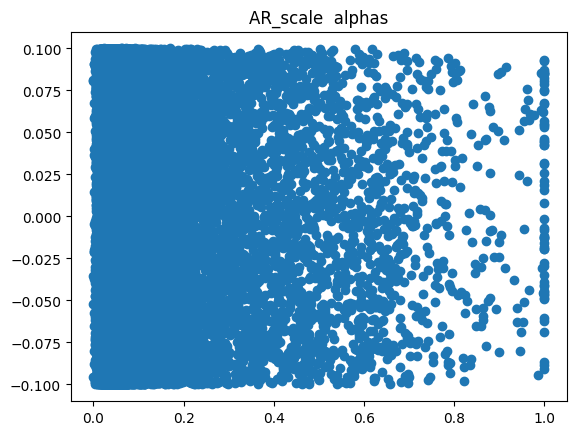

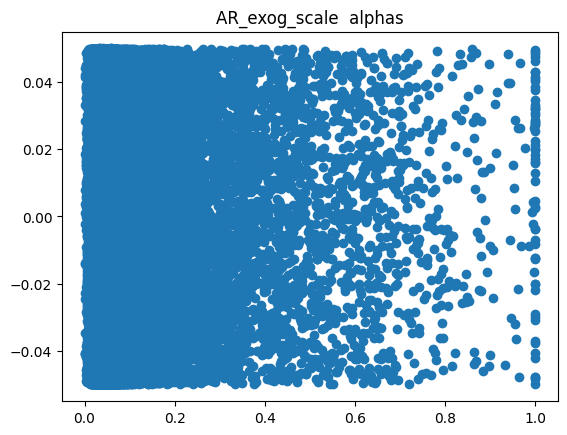

###################################


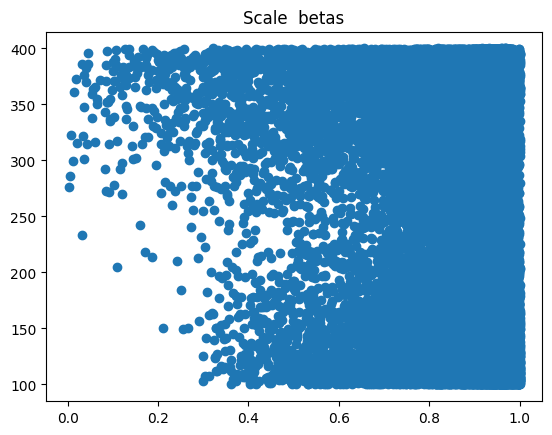

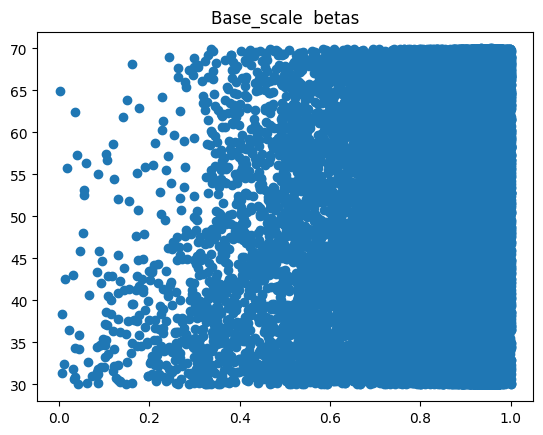

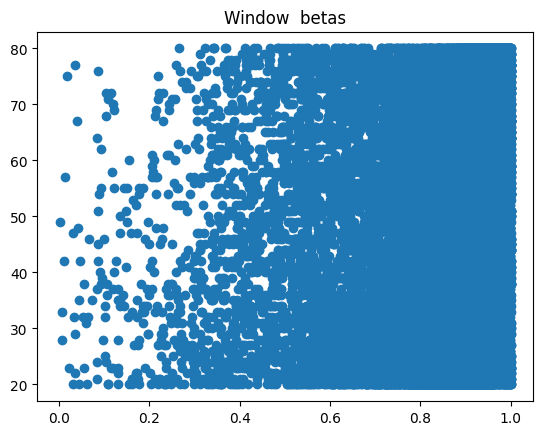

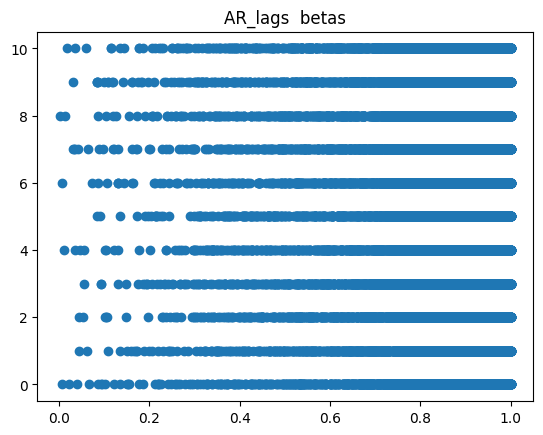

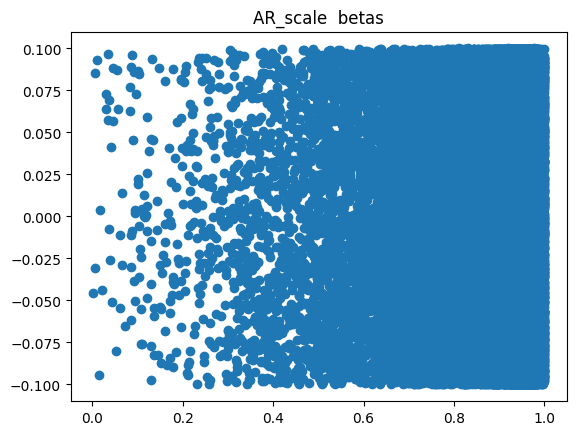

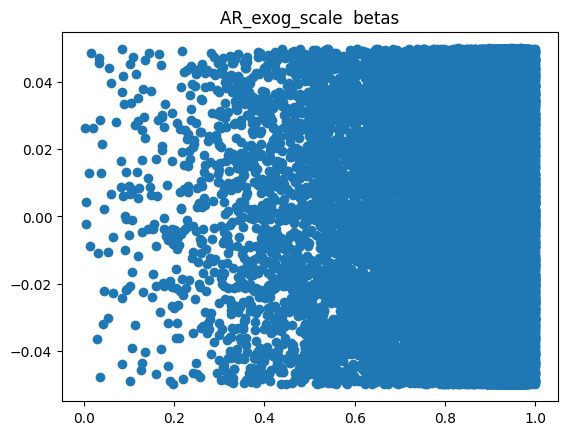

###################################


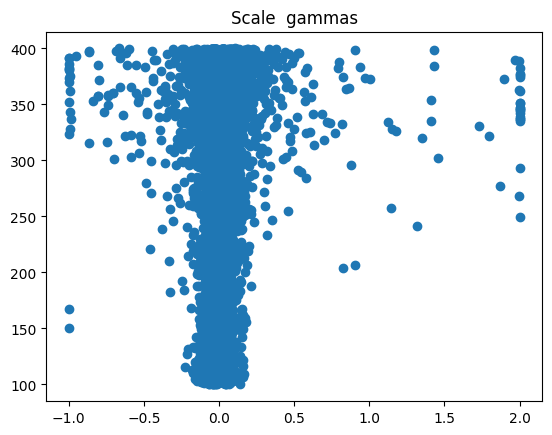

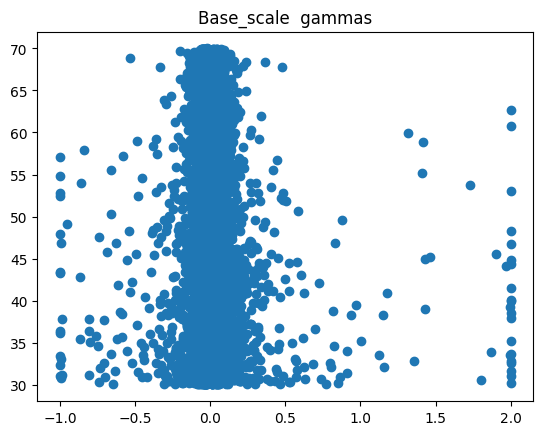

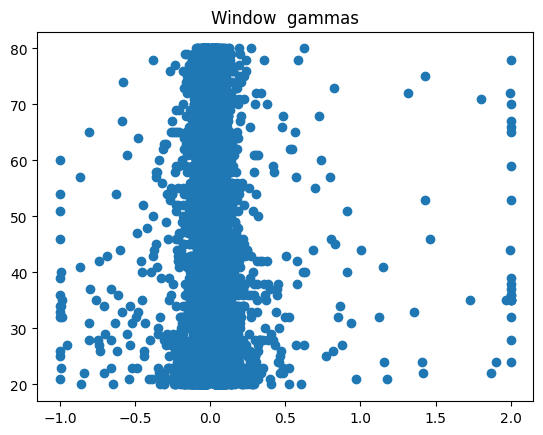

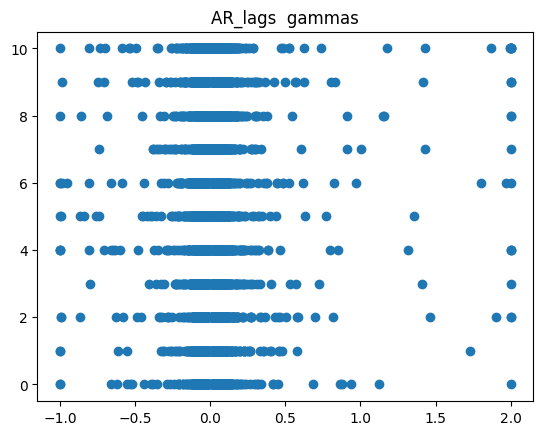

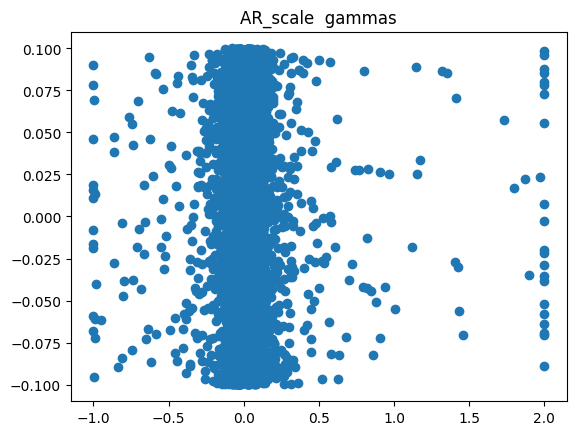

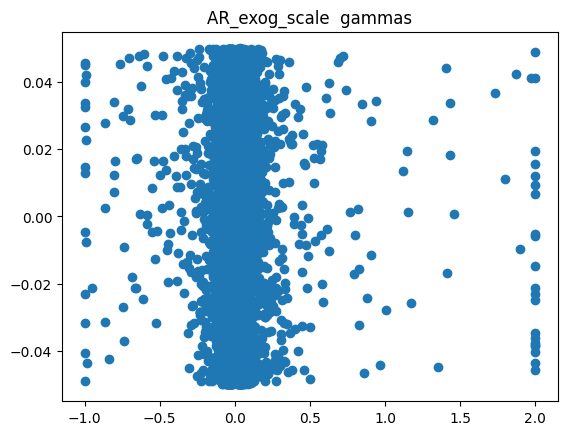

###################################


In [39]:
#Ad-Hoc scatterplot of alphas and other variables
df = load_random_data()
#df["constant"] = 1

df["alpha_signif"] = df["alphas_pval"] <= 0.05
df["beta_signif"] = df["betas_pval"] <= 0.05
df["gamma_signif"] = df["gammas_pval"] <= 0.05

independent = [ 'Scale', 'Base_scale', 'Window', 'AR_lags', 'AR_scale', 'AR_exog_scale']

for variable, p_val in zip(['alphas', 'betas', 'gammas'], ['alphas_pval', 'betas_pval', 'gammas_pval']):
    data = df[df[p_val] <= 0.05]
    for indep in independent:
        #plt.hist(df[variable][~df[sig_var]], bins = 100, edgecolor = "black")
        plt.scatter(data[variable], data[indep])
        plt.title(indep + '  ' + variable)
        plt.show()
    print("###################################")


##Hmmm the scatter plot of scale and betas suggest that a squared Scale would make sense.    


## Conclusion on OLS modeling of parameters-meassures dependence

Lets keep the squared scale, both histograms and scatterplots show it might be a good addition. Intercept behavior is weird, so get rid of it. But on the other hand the intercept makes sense as the variables are limited to certain range, so there is something like a 'base value' to the meassures.